In [543]:
# make sure the csv file is in the same folder as Anaconda
import pandas as pd
df = pd.read_csv('C:/Users/arosh/anaconda3/ViewingActivity.csv')

In [544]:
# number of rows and columns in the dataframe
df.shape

(17290, 10)

In [545]:
# returns specific amount of rows
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Arosh,2023-08-11 03:23:02,00:00:59,NaN,The Tailor: Season 1: Episode 1,NaN,Apple iPhone SE Gen 2 iPhone,00:24:42,00:24:42,US (United States)


In [546]:
# list of data types for each column in the dataframe
df.dtypes

Profile Name               object
Start Time                 object
Duration                   object
Attributes                 object
Title                      object
Supplemental Video Type    object
Device Type                object
Bookmark                   object
Latest Bookmark            object
Country                    object
dtype: object

In [547]:
# change to pandas's datetime and add UTC timezone 
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                            object
Start Time                 datetime64[ns, UTC]
Duration                                object
Attributes                              object
Title                                   object
Supplemental Video Type                 object
Device Type                             object
Bookmark                                object
Latest Bookmark                         object
Country                                 object
dtype: object

In [548]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

# double-check that it worked
df.head(1)

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,2023-08-10 23:23:02-04:00,Arosh,00:00:59,NaN,The Tailor: Season 1: Episode 1,NaN,Apple iPhone SE Gen 2 iPhone,00:24:42,00:24:42,US (United States)


In [549]:
# convert to timedelta which is a measure of time duration that pandas understands
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time                 datetime64[ns, US/Eastern]
Profile Name                                   object
Duration                              timedelta64[ns]
Attributes                                     object
Title                                          object
Supplemental Video Type                        object
Device Type                                    object
Bookmark                                       object
Latest Bookmark                                object
Country                                        object
dtype: object

In [550]:
# create a new dataframe called bb that takes from df
# only the rows in which the title column contains Breaking Bad
bb = df[df['Title'].str.contains('Breaking Bad', regex=False)]

In [551]:
# inspects ten rows of the bb dataframe
bb.sample(10)

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
11891,2019-02-04 21:00:10-05:00,zohra,0 days 00:46:36,Autoplayed: user action: Unspecified;,Breaking Bad: Season 5: Blood Money (Episode 9),NaN,Netflix Linux Firefox Other,00:46:48,00:46:48,US (United States)
1346,2021-12-16 16:49:33-05:00,Arosh,0 days 00:21:22,NaN,Breaking Bad: Season 4: Crawl Space (Episode 11),NaN,Netflix Chrome MAC (Cadmium) HTML 5,00:21:22,Not latest view,US (United States)
12050,2018-12-02 21:03:36-05:00,zohra,0 days 00:00:02,Autoplayed: user action: Unspecified;,Breaking Bad: Season 2: Breakage (Episode 5),NaN,Netflix Linux Firefox Other,00:00:03,Not latest view,US (United States)
11895,2019-02-03 19:50:42-05:00,zohra,0 days 00:47:07,Autoplayed: user action: Unspecified;,Breaking Bad: Season 5: Dead Freight (Episode 5),NaN,Netflix Linux Firefox Other,00:47:19,00:47:19,US (United States)
7604,2023-02-14 02:27:36-05:00,zohra,0 days 00:00:16,Autoplayed: user action: None;,Breaking Bad: Season 1_hook_02_16x9,HOOK,Chrome PC (Cadmium),00:00:16,Not latest view,US (United States)
1313,2021-12-24 02:12:48-05:00,Arosh,0 days 00:00:04,NaN,El Camino: A Breaking Bad Movie,NaN,Chrome PC (Cadmium),00:00:04,00:00:04,US (United States)
11985,2018-12-22 17:12:13-05:00,zohra,0 days 00:00:03,NaN,Breaking Bad: Season 3: Green Light (Episode 4),NaN,Apple iPhone 7 (GSM),00:00:04,Not latest view,US (United States)
1438,2021-10-14 23:07:00-04:00,Arosh,0 days 00:00:01,Autoplayed: user action: None;,Breaking Bad: Season 3: I See You (Episode 8),NaN,Microsoft Xbox One X,00:00:01,Not latest view,US (United States)
1450,2021-10-10 21:48:54-04:00,Arosh,0 days 00:46:29,Autoplayed: user action: User_Interaction;,Breaking Bad: Season 3: No Más (Episode 1),NaN,Microsoft Xbox One X,00:46:39,00:46:39,US (United States)
12057,2018-12-01 21:15:03-05:00,zohra,0 days 00:45:31,Autoplayed: user action: Unspecified;,Breaking Bad: Season 2: Seven Thirty-Seven (Ep...,NaN,Netflix Linux Firefox Other,00:46:35,00:46:35,US (United States)


In [552]:
# limits to only rows where duration is greater than one minute
bb = bb[(bb['Duration'] > '0 days 00:01:00')]
bb.shape

(137, 10)

In [553]:
# adds up total duration 
bb['Duration'].sum()

Timedelta('4 days 02:41:44')

In [554]:
# creating new columns for weekday and hour that was most watched on 
bb['weekday'] = bb['Start Time'].dt.weekday
bb['hour'] = bb['Start Time'].dt.hour

# check to make sure the columns were added correctly
bb.head(1)

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,weekday,hour
1314,2021-12-24 01:18:08-05:00,Arosh,0 days 00:54:35,NaN,Breaking Bad: Season 5: Felina (Episode 16),NaN,Chrome PC (Cadmium),00:54:39,00:54:39,US (United States),4,1


In [555]:
# makes chart show up on Jupyter notebook
%matplotlib inline
import matplotlib
import datetime

In [556]:
# set our categorical and define the order so the days are plotted Monday-Sunday
bb['weekday'] = pd.Categorical(bb['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

In [557]:
# create bb_by_day and count the rows for each weekday, assigning the result to that variable
bb_by_day = bb['weekday'].value_counts()

In [558]:
# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
bb_by_day = bb_by_day.sort_index()

In [559]:
# update the font size to make it larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

<Axes: title={'center': 'Breaking Bad Episodes Watched by Day'}>

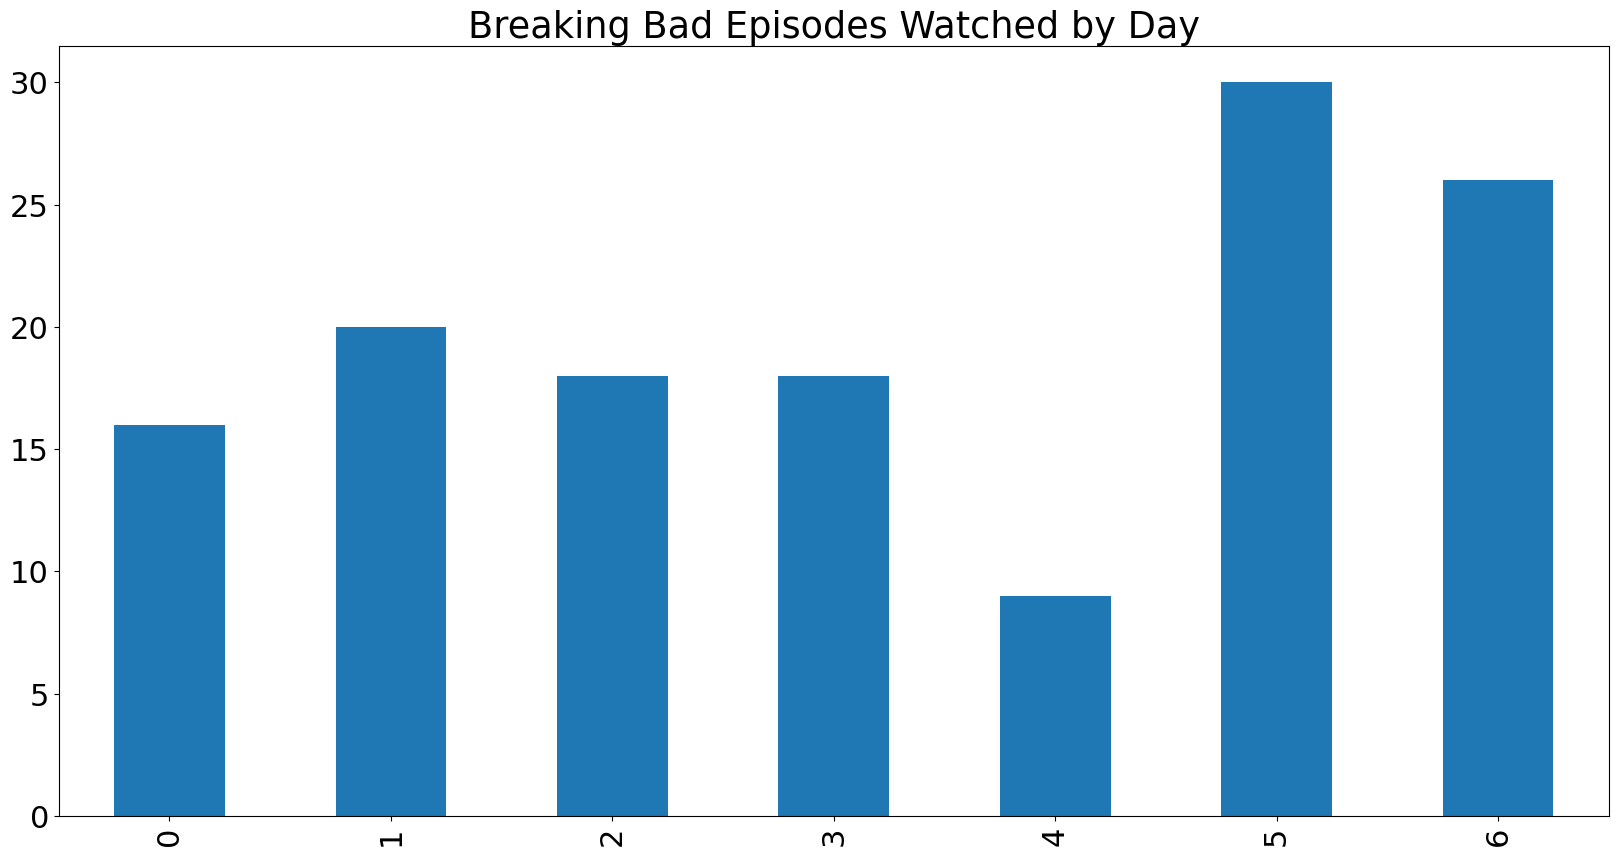

In [560]:
# plot bb_by_day as a bar chart with the listed size and title
bb_by_day.plot(kind='bar', figsize=(20,10), title='Breaking Bad Episodes Watched by Day')

<Axes: title={'center': 'Breaking Bad Episodes Watched by Hour'}>

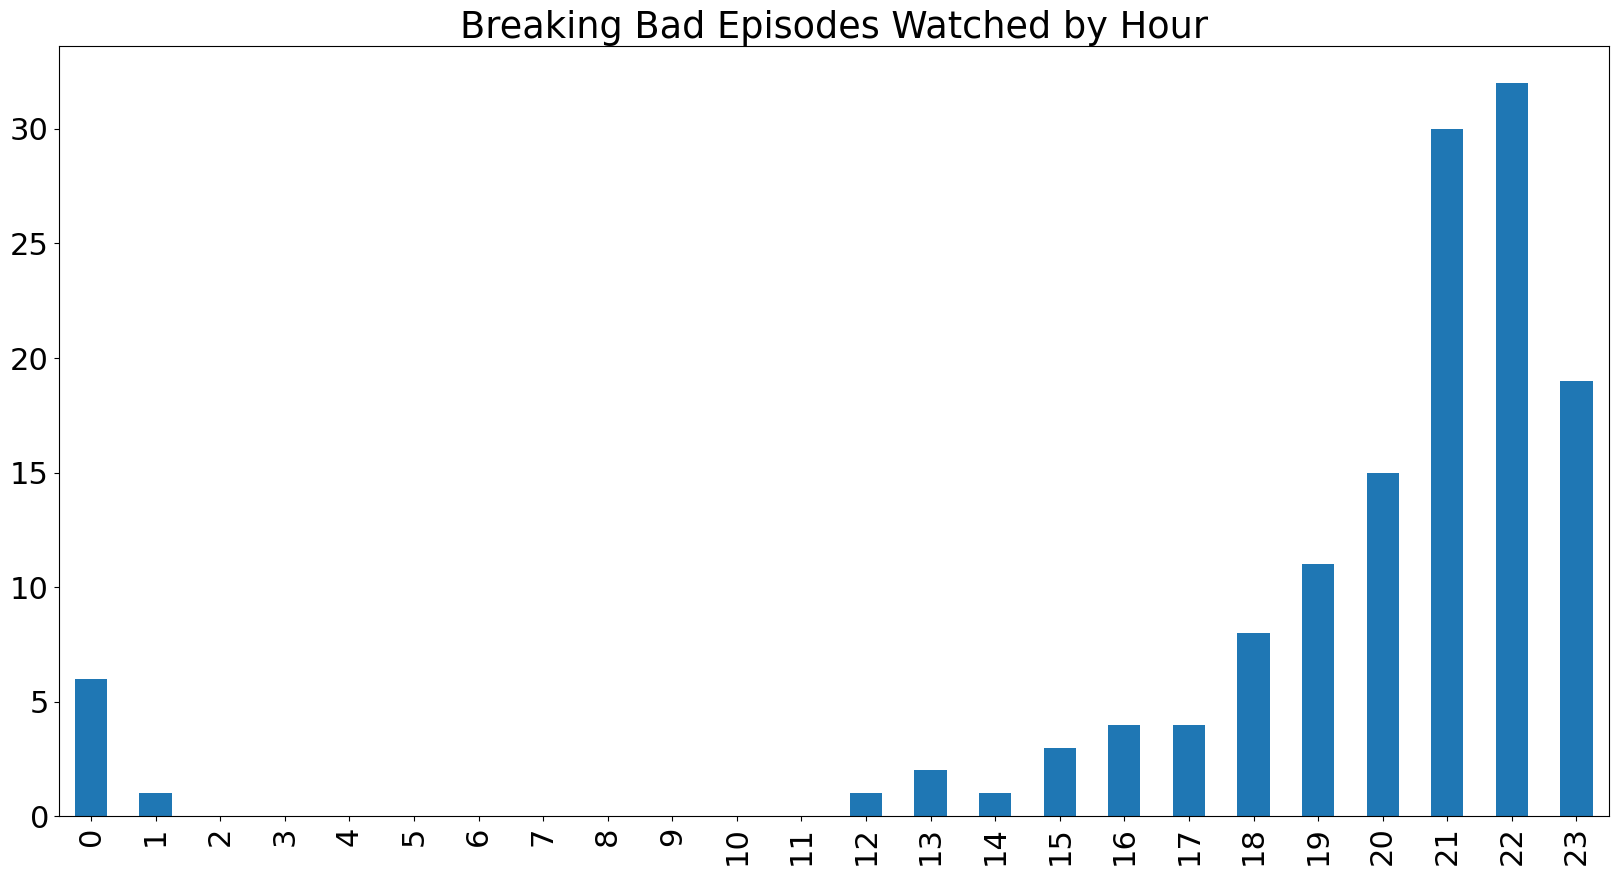

In [542]:
# set our categorical and define the order so the hours are plotted 0-23
bb['hour'] = pd.Categorical(bb['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create bb_by_hour and count the rows for each hour, assigning the result to that variable
bb_by_hour = bb['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
bb_by_hour = bb_by_hour.sort_index()

# plot bb_by_hour as a bar chart with the listed size and title
bb_by_hour.plot(kind='bar', figsize=(20,10), title='Breaking Bad Episodes Watched by Hour')